### Ejemplo de Curva de Accuracy Training y Testing 

- Con scikit-learn es posible cargar set de datos, para una revisión detallada de cuales sets favor revisar: http://scikit-learn.org/stable/datasets/index.html#toy-datasets

- Procedemos a cargar las librerias correspondientes, train_test_split ya lo conocemos de la práctica anterior. La novedad acá es KNeighborsClassifier que corresponde al clasificador kNN y el llamado del dataset load_breast_cancer:

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Se carga ahora el set de datos load_breast_cancer:

In [5]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42) 

# notar que se indica un 20% para el testing data

Inicializamos las listas (se debe ejecutar, cada vez que se calcule la curva de abajo):

In [15]:
training_accuracy = []
test_accuracy = []

Creamos la curva de "training/test acurracy vrs. k", para más detalle del parámetro score refererirse a la documentación en: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

NOTA: La rutina descrita a continuación, se puede usar para diferentes rangos y diferentes hiper-parámetros, en algunos casos dependiendo de los aspectos anteriores el tiempo de ejecución puede tomar más tiempo dependiendo del poder computacional disponible.

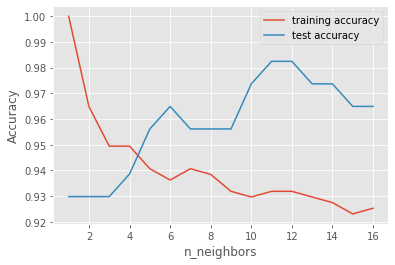

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

neighbors_settings = range(1, 17)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

En que valor de k, se obtiene el mejor ajuste?